In [4]:
from cvfwVer2 import CVFW_MODEL, CVFW_UPDATE

cvfw_model = CVFW_MODEL(dsize=(64, 64))

cvfw_model.add_directory(class_name="female face", path="C:\\kimdonghwan\\python\\CVFW\\image\\train\\face\\femaleface")
cvfw_model.add_directory(class_name="male face", path="C:\\kimdonghwan\\python\\CVFW\\image\\train\\face\\maleface")

In [5]:
cvfw_model.train()

male face: 100%|██████████████████████████████████████████████████████████████████| 4096/4096 [00:16<00:00, 253.85it/s]


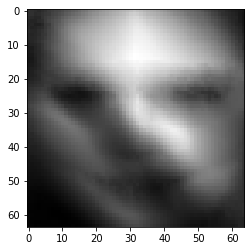

In [6]:
import matplotlib.pyplot as plt

modeling = cvfw_model.modeling(class_name="female face")
plt.imshow(modeling, cmap="gray")

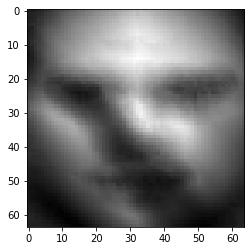

In [7]:
modeling = cvfw_model.modeling(class_name="male face")
plt.imshow(modeling, cmap="gray")

In [36]:
cvfw_update = CVFW_UPDATE(cvfw_model, feature_group_number=[100, 500], feature_weight_number=[30, 50])
cvfw_update.add_validation(class_name="female face", path = "C:\\kimdonghwan\\python\\CVFW\\image\\test\\face\\femaleface")
cvfw_update.add_validation(class_name="male face", path = "C:\\kimdonghwan\\python\\CVFW\\image\\test\\face\\maleface")

In [6]:
cvfw_update.update()

feature_group_number: 100, feature_weight_nummber: 30 Done!, accuracy: 0.676
feature_group_number: 100, feature_weight_nummber: 50 Done!, accuracy: 0.644
feature_group_number: 500, feature_weight_nummber: 30 Done!, accuracy: 0.676
feature_group_number: 500, feature_weight_nummber: 50 Done!, accuracy: 0.644


In [8]:
cvfw_update.set(feature_group_number = [30, 100, 500], feature_weight_number = [0])
cvfw_update.update()

feature_group_number: 30, feature_weight_nummber: 0 Done!, accuracy: 0.714
feature_group_number: 100, feature_weight_nummber: 0 Done!, accuracy: 0.588
feature_group_number: 500, feature_weight_nummber: 0 Done!, accuracy: 0.542


In [11]:
cvfw_update.set(feature_group_number = [5, 7, 10], feature_weight_number = [0, 20])
cvfw_update.update()

feature_group_number: 5, feature_weight_nummber: 0 Done!, accuracy: 0.748
feature_group_number: 5, feature_weight_nummber: 20 Done!, accuracy: 0.7
feature_group_number: 7, feature_weight_nummber: 0 Done!, accuracy: 0.746
feature_group_number: 7, feature_weight_nummber: 20 Done!, accuracy: 0.686
feature_group_number: 10, feature_weight_nummber: 0 Done!, accuracy: 0.738
feature_group_number: 10, feature_weight_nummber: 20 Done!, accuracy: 0.678


In [12]:
cvfw_update.set(feature_group_number = [3, 4], feature_weight_number = [0])
cvfw_update.update()

feature_group_number: 3, feature_weight_nummber: 0 Done!, accuracy: 0.704
feature_group_number: 4, feature_weight_nummber: 0 Done!, accuracy: 0.732


In [13]:
cvfw_update.set(feature_group_number = [6], feature_weight_number = [0])
cvfw_update.update()

feature_group_number: 6, feature_weight_nummber: 0 Done!, accuracy: 0.738


In [17]:
cvfw_update.set(feature_group_number = [10, 50], feature_weight_number = [5])
cvfw_update.update()

feature_group_number: 10, feature_weight_nummber: 5 Done!, accuracy: 0.74
feature_group_number: 50, feature_weight_nummber: 5 Done!, accuracy: 0.68


In [37]:
cvfw_update.set(feature_group_number = [7], feature_weight_number = [5])
cvfw_update.update()

feature_group_number: 7, feature_weight_nummber: 5 Done!, accuracy: 0.748


### 최적의 feature_group_number, feature_weight_number
- feature_group_number: 7
- feature_weight_number: 5
- accuracy: 74.8%

In [32]:
model = CVFW_MODEL(dsize=(64, 64), feature_group_number = 7, feature_weight_number = 5)

model.add_directory(class_name="female face", path="C:\\kimdonghwan\\python\\CVFW\\image\\train\\face\\femaleface")
model.add_directory(class_name="male face", path="C:\\kimdonghwan\\python\\CVFW\\image\\train\\face\\maleface")

model.train()

male face: 100%|██████████████████████████████████████████████████████████████████| 4096/4096 [00:17<00:00, 233.44it/s]


0.748


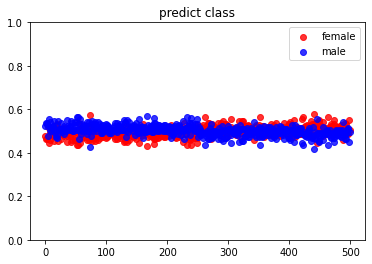

In [41]:
from os import listdir
import cv2

count = 0
answer = 0

female_files = listdir("C:\\kimdonghwan\\python\\CVFW\\image\\test\\face\\femaleface")
male_files = listdir("C:\\kimdonghwan\\python\\CVFW\\image\\test\\face\\maleface")

predicts = []

for file in female_files:
    img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\test\\face\\femaleface\\{file}", 1), cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, dsize=(64, 64)).flatten().tolist()
    predict = model.predict_class(img)
    predicts.append(predict)
    
    if min(predict) == predict[0]: answer += 1
    count += 1
    
for file in male_files:
    img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\test\\face\\maleface\\{file}", 1), cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, dsize=(64, 64)).flatten().tolist()
    predict = model.predict_class(img)
    predicts.append(predict)
    
    if min(predict) == predict[1]: answer += 1
    count += 1

print(answer / count)

x = [i for i in range(len(predicts))]
female_y = [i[0] for i in predicts]
male_y = [i[1] for i in predicts]

plt.scatter(x, female_y, color="red", label="female", alpha=0.8)
plt.scatter(x, male_y, color="blue", label="male", alpha=0.8)
plt.ylim(0, 1.0)
plt.title("predict class")
plt.legend()

[0.4758952121383421, 0.5241047878616579]


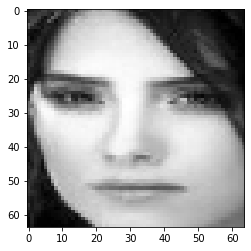

In [98]:
female_img = cv2.cvtColor(cv2.imread("C:\\kimdonghwan\\python\\CVFW\\image\\test\\face\\femaleface\\ (1).jpg", 1), cv2.COLOR_BGR2GRAY)
female_img = cv2.resize(female_img, dsize=(64, 64))

plt.imshow(female_img, cmap="gray")
print(model.predict_class(female_img.flatten().tolist()))

[0.5453794190607248, 0.45462058093927504]


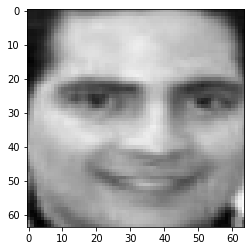

In [104]:
male_img = cv2.cvtColor(cv2.imread("C:\\kimdonghwan\\python\\CVFW\\image\\test\\face\\maleface\\ (4).jpg", 1), cv2.COLOR_BGR2GRAY)
male_img = cv2.resize(male_img, dsize=(64, 64))

plt.imshow(male_img, cmap="gray")
print(model.predict_class(male_img.flatten().tolist()))